In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

In [7]:
start_date = '2014-01-01'
end_date = '2023-02-28'

In [8]:
bradesco = yf.download('BBDC4.SA', start=start_date, end=end_date)
bb = yf.download('BBAS3.SA', start=start_date, end=end_date)
itau = yf.download('ITUB4.SA', start=start_date, end=end_date)
santander = yf.download('SANB11.SA', start=start_date, end=end_date)
btg = yf.download('BPAC11.SA', start=start_date, end=end_date)
abc = yf.download('ABCB4.SA', start=start_date, end=end_date)
pine = yf.download('PINE4.SA', start=start_date, end=end_date)
banrisul = yf.download('BRSR6.SA', start=start_date, end=end_date)
banest = yf.download('BEES3.SA', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
codigos = ['BBDC4', 'BBAS3', 'ITUB4', 'SANB11', 'BPAC11', 'ABCB4', 'PINE4', 'BRSR6', 'BEES3']

In [10]:
mercado_bancos = pd.concat([bradesco, bb, itau, santander, btg, abc, pine, banrisul, banest], axis=1, keys=codigos)

In [11]:
mercado_bancos.columns.names = ['Cod Banco', 'Info Geral']

In [12]:
mercado_bancos.head()

Cod Banco       BBDC4                                                       \
Info Geral       Open       High        Low      Close Adj Close    Volume   
Date                                                                         
2014-01-02  11.383557  11.465876  11.273798  11.258118  7.277796  17581311   
2014-01-03  11.328678  11.340438  11.140520  11.214999  7.249929  33716689   
2014-01-06  11.171879  11.312998  11.109160  11.309078  7.310743  21140788   
2014-01-07  11.289478  11.340438  11.030761  11.062121  7.151095  13700912   
2014-01-08  11.128760  11.191479  10.940602  11.054281  7.146028  18768314   

Cod Banco       BBAS3                                   ...  BRSR6         \
Info Geral       Open       High        Low      Close  ...    Low  Close   
Date                                                    ...                 
2014-01-02  24.450001  24.480000  23.950001  24.000000  ...  12.46  12.73   
2014-01-03  24.020000  24.250000  23.850000  24.250000  ...  12.65  12.70   
2014-01-06  24.020000  24.049999  23.610001  23.889999  ...  12.23  12.45   
2014-01-07  23.900000  24.100000  23.420000  23.480000  ...  11.96  12.00   
2014-01-08  23.500000  23.570000  22.969999  23.010000  ...  11.65  11.77   

Cod Banco                     BEES3                                     
Info Geral Adj Close   Volume  Open  High   Low Close Adj Close Volume  
Date                                                                    
2014-01-02  6.714185   772000  2.45  2.45  2.40  2.45  1.285997  20080  
2014-01-03  6.698362   378900  2.40  2.45  2.40  2.45  1.285997   1520  
2014-01-06  6.566505  1635500  2.45  2.45  2.35  2.45  1.285997   2700  
2014-01-07  6.329162   891700  2.35  2.40  2.30  2.40  1.259752  34540  
2014-01-08  6.207855  1056500  2.40  2.40  2.40  2.40  1.259752   6020  

[5 rows x 54 columns]

In [13]:
mercado_bancos.xs(key='Close', axis=1, level='Info Geral').min()
#Menor valor de mercado de cada banco

Cod Banco
BBDC4      8.001417
BBAS3     12.700000
ITUB4     13.981818
SANB11    10.970000
BPAC11     3.150000
ABCB4      6.246742
PINE4      0.990000
BRSR6      4.130000
BEES3      1.680000
dtype: float64

In [14]:
mercado_bancos.xs(key='Close', axis=1, level='Info Geral').idxmin()
#Data do menor valor de mercado

Cod Banco
BBDC4    2016-01-21
BBAS3    2016-01-27
ITUB4    2016-01-20
SANB11   2014-02-05
BPAC11   2017-06-22
ABCB4    2015-12-21
PINE4    2022-06-30
BRSR6    2016-01-28
BEES3    2016-01-21
dtype: datetime64[ns]

In [15]:
mercado_bancos.xs(key='Close', axis=1, level='Info Geral').max()
#Maior Valor de marcado

Cod Banco
BBDC4     29.609316
BBAS3     55.180000
ITUB4     39.689999
SANB11    51.040001
BPAC11    32.270000
ABCB4     23.750000
PINE4      9.146234
BRSR6     26.500000
BEES3      7.620000
dtype: float64

In [16]:
mercado_bancos.xs(key='Close', axis=1, level='Info Geral').idxmax()
#Data do Maior valor de mercado

Cod Banco
BBDC4    2019-07-05
BBAS3    2019-07-04
ITUB4    2019-02-04
SANB11   2020-01-02
BPAC11   2021-07-26
ABCB4    2020-02-05
PINE4    2014-01-02
BRSR6    2019-03-15
BEES3    2020-02-11
dtype: datetime64[ns]

In [17]:
retorno = pd.DataFrame()

In [18]:
for cod in codigos:
    retorno['RETORNO '+cod] = mercado_bancos[cod]['Close'].pct_change()
retorno.head()

,RETORNO BBDC4,RETORNO BBAS3,RETORNO ITUB4,RETORNO SANB11,RETORNO BPAC11,RETORNO ABCB4,RETORNO PINE4,RETORNO BRSR6,RETORNO BEES3
Date,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.003830,0.010417,-0.001904,-0.002930,NaN,0.018488,-0.016667,-0.002357,0.000000
2014-01-06,0.008389,-0.014845,0.001589,0.000735,NaN,0.010726,-0.002991,-0.019685,0.000000
2014-01-07,-0.021837,-0.017162,-0.007617,0.006608,NaN,0.000000,0.009268,-0.036145,-0.020408
2014-01-08,-0.000709,-0.020017,0.015670,0.025529,NaN,0.023673,-0.008840,-0.019167,0.000000


In [19]:
retorno.max()
#Maior Retorno em um dia

RETORNO BBDC4     0.168669
RETORNO BBAS3     0.171261
RETORNO ITUB4     0.110593
RETORNO SANB11    0.157771
RETORNO BPAC11    0.278941
RETORNO ABCB4     0.170859
RETORNO PINE4     0.340314
RETORNO BRSR6     0.150070
RETORNO BEES3     0.105769
dtype: float64

In [20]:
retorno.idxmax() 
#13 de Março - Um dia após o colapso da bolsa (Pandemia Covid)

RETORNO BBDC4    2020-03-13
RETORNO BBAS3    2020-03-24
RETORNO ITUB4    2020-03-13
RETORNO SANB11   2014-04-29
RETORNO BPAC11   2020-03-13
RETORNO ABCB4    2020-03-25
RETORNO PINE4    2019-05-31
RETORNO BRSR6    2020-03-10
RETORNO BEES3    2016-05-12
dtype: datetime64[ns]

In [21]:
retorno.min()
#Menor Retorno em um dia

RETORNO BBDC4    -0.173843
RETORNO BBAS3    -0.211712
RETORNO ITUB4    -0.179643
RETORNO SANB11   -0.134740
RETORNO BPAC11   -0.268633
RETORNO ABCB4    -0.149673
RETORNO PINE4    -0.219388
RETORNO BRSR6    -0.201531
RETORNO BEES3    -0.109244
dtype: float64

In [22]:
retorno.idxmin()
#12 de Março de 2020 - Colapso Bolsa (Pandemia Covid)

RETORNO BBDC4    2022-11-09
RETORNO BBAS3    2016-03-15
RETORNO ITUB4    2021-10-04
RETORNO SANB11   2020-03-12
RETORNO BPAC11   2020-03-12
RETORNO ABCB4    2020-03-16
RETORNO PINE4    2020-03-18
RETORNO BRSR6    2017-05-18
RETORNO BEES3    2020-03-12
dtype: datetime64[ns]

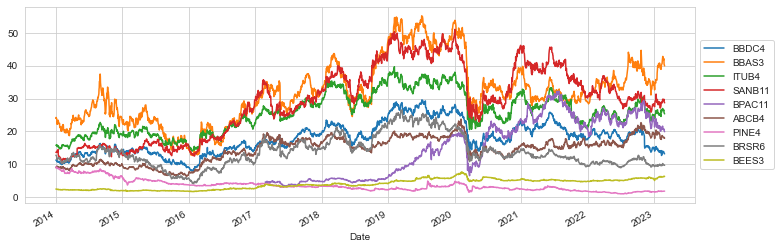

In [23]:
mercado_bancos.xs(key='Close', axis = 1, level = 'Info Geral').plot(figsize=(12,4), label = cod)
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5))

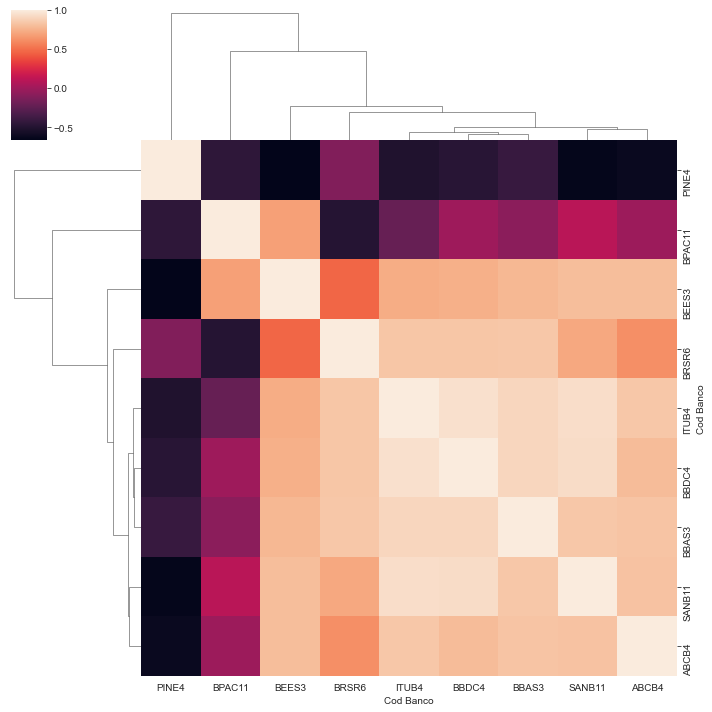

In [24]:
sns.clustermap(mercado_bancos.xs(key='Close', axis = 1, level = 'Info Geral').corr())

In [25]:
retorno.std()
#Baixa Variação no geral - PINE4 maior risco, Banco do Estado do ES(BEES3) menor risco

RETORNO BBDC4     0.023279
RETORNO BBAS3     0.028037
RETORNO ITUB4     0.020887
RETORNO SANB11    0.023225
RETORNO BPAC11    0.030582
RETORNO ABCB4     0.021577
RETORNO PINE4     0.032088
RETORNO BRSR6     0.026286
RETORNO BEES3     0.017967
dtype: float64

In [26]:
retorno.loc['2022-01-01':'2022-12-31'].std()
#Desvio Padrão de 2022 - Seguindo com PINE4 maior variação e Banco do Estado do ES(BEES3) menor

RETORNO BBDC4     0.020345
RETORNO BBAS3     0.020750
RETORNO ITUB4     0.016915
RETORNO SANB11    0.017799
RETORNO BPAC11    0.027109
RETORNO ABCB4     0.019935
RETORNO PINE4     0.028086
RETORNO BRSR6     0.019413
RETORNO BEES3     0.010371
dtype: float64

C:\Users\eduar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\eduar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



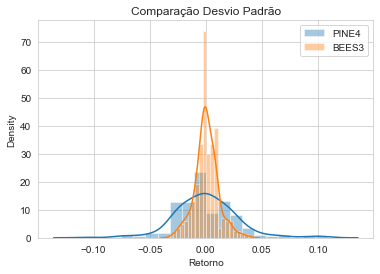

In [27]:
ax = sns.distplot(retorno.loc['2022-01-01':'2022-12-31']['RETORNO PINE4'], label='PINE4')
ax = sns.distplot(retorno.loc['2022-01-01':'2022-12-31']['RETORNO BEES3'], label='BEES3')
ax.set_title('Comparação Desvio Padrão')
plt.xlabel('Retorno')
plt.legend()
#DIFERENÇA DE DESVIO PADRÃO EM UMA ANÁLISE EM GRÁFICO

In [28]:
mercado_bancos.xs(key='Volume' , axis=1, level='Info Geral').sum().sort_values(ascending=False).head(4)
#4 bancos com maior volume de vendas

Cod Banco
BBDC4     7.140327e+10
ITUB4     6.148780e+10
BBAS3     2.756990e+10
BPAC11    1.258434e+10
dtype: float64

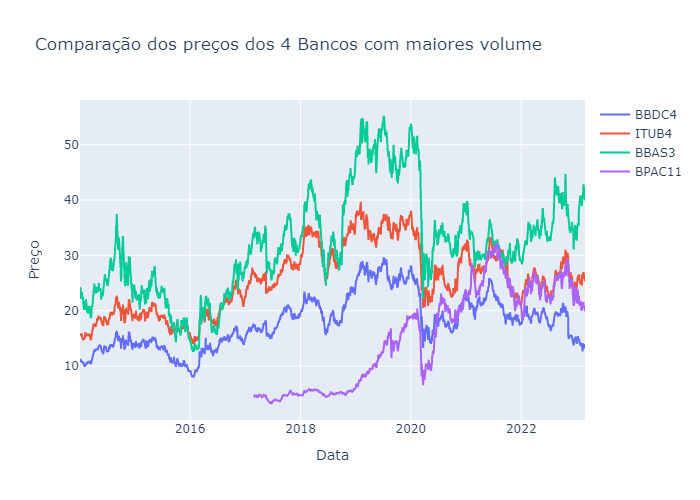

In [39]:
codes = ['BBDC4', 'ITUB4', 'BBAS3', 'BPAC11'] 
data = []
for code in codes:
    trace = go.Scatter(x=mercado_bancos.index, y=mercado_bancos[code, 'Close'], mode='lines', name=code)
    data.append(trace)
layout = go.Layout(title='Comparação dos preços dos 4 Bancos com maiores volume', xaxis=dict(title='Data'), yaxis=dict(title='Preço'))
fig = go.Figure(data=data, layout=layout)
fig.show('png')
#GRÁFICO INTERATIVO DOS 4 BANCOS COM OS MAIORES VOLUME, PORÉM EM PNG POR O GITHUB NÃO ACEITAR JS

Text(0.5, 0.98, 'Comparação dos preços dos 4 Bancos com maiores volume')

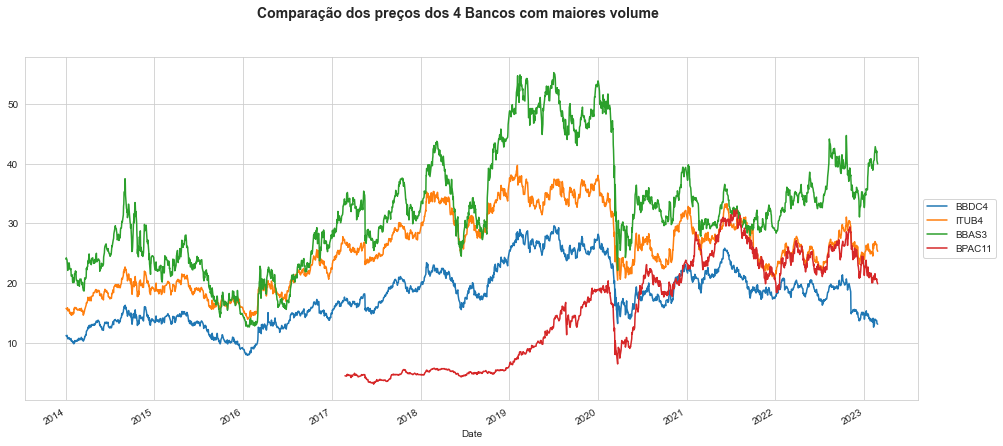

In [30]:
mercado_bancos.xs(key='Close', axis = 1, level = 'Info Geral')[['BBDC4','ITUB4','BBAS3','BPAC11']].plot(figsize=(16,7), label = cod)
plt.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plt.suptitle('Comparação dos preços dos 4 Bancos com maiores volume', fontsize=14, fontweight='bold')
#NOTA SE QUE OS VALORES DOS BANCOS COSTUMAR TER UMA RELAÇÃO

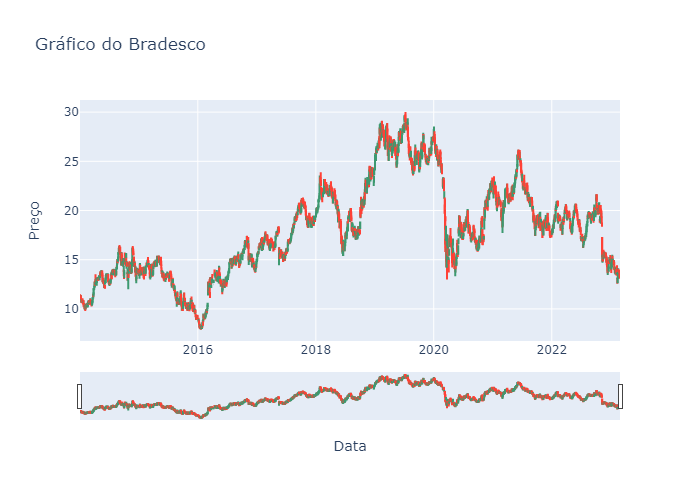

In [35]:
#BANCO COM MAIOR VOLUME DE COMPRAS
cod = 'BBDC4'
trace = go.Candlestick(x=mercado_bancos.index,
                       open=mercado_bancos[cod, 'Open'],
                       high=mercado_bancos[cod, 'High'],
                       low=mercado_bancos[cod, 'Low'],
                       close=mercado_bancos[cod, 'Close'],
                       name=cod)
data = [trace]
layout = go.Layout(title='Gráfico do Bradesco', xaxis=dict(title='Data'), yaxis=dict(title='Preço'))
fig = go.Figure(data=data, layout=layout)
fig.show("png")
#GRÁFICO INTERATIVO DO BRADESCO, PORÉM EM PNG POR O GITHUB NÃO ACEITAR JS